In [2]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")
print(os.getcwd())

Started
/mnt/brain5/scratch/wcarvalh/projects/rljax/analysis/archive


In [3]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,
        njobs=1,
        verbose=1,
    )
)

In [5]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        # "respawn_baselines/*/*",
        "unsup_respawn_model_v2/*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/unsup_respawn_model_v2/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/unsup_respawn_model_v2/*/*: 16


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83055.52it/s]

Added: 8
{'seperate_cumulant_params': {False, True},
 'seperate_model_params': {False, True},
 'seperate_value_params': {False, True}}


,seperate_cumulant_params,seperate_model_params,seperate_value_params
0,False,False,False
1,False,False,True
2,True,False,False
3,True,False,True
4,False,True,False
5,False,True,True
6,True,True,False
7,True,True,True


In [5]:
run_data.load_tensorboard(
    njobs=8,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    load_paths=True,
)

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/unsup_respawn_model_v2/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/unsup_respawn_model_v2/*/*: 16


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 14573.04it/s]


Added: 0


settings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:34<00:00, 19.25s/it]

Keys:
['usfa/EvaluatorSteps',
 'usfa/ActorSteps',
 'usfa/StepsPerSecond',
 'usfa/LearnerSteps',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/StepsPerSecond',
 'actor/EvaluatorSteps',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/LearnerSteps',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/ActorSteps',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/LearnerSteps']


In [6]:
key_with_legend = '1,1,0,0'
filter_key =  '-1,1,-1,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=f'evaluator/0.Task/{key_with_legend}/EpisodeReturn',
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='mean',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
)

# Unsupervised FARM vs. LSTM

,num_seeds,agent
0,2,usfa_farm_model
1,2,usfa_farm_model
2,2,usfa_farm_model
3,2,usfa_farm_model
4,2,usfa_farm_model
5,2,usfa_farm_model
6,2,usfa_farm_model
7,2,usfa_farm_model


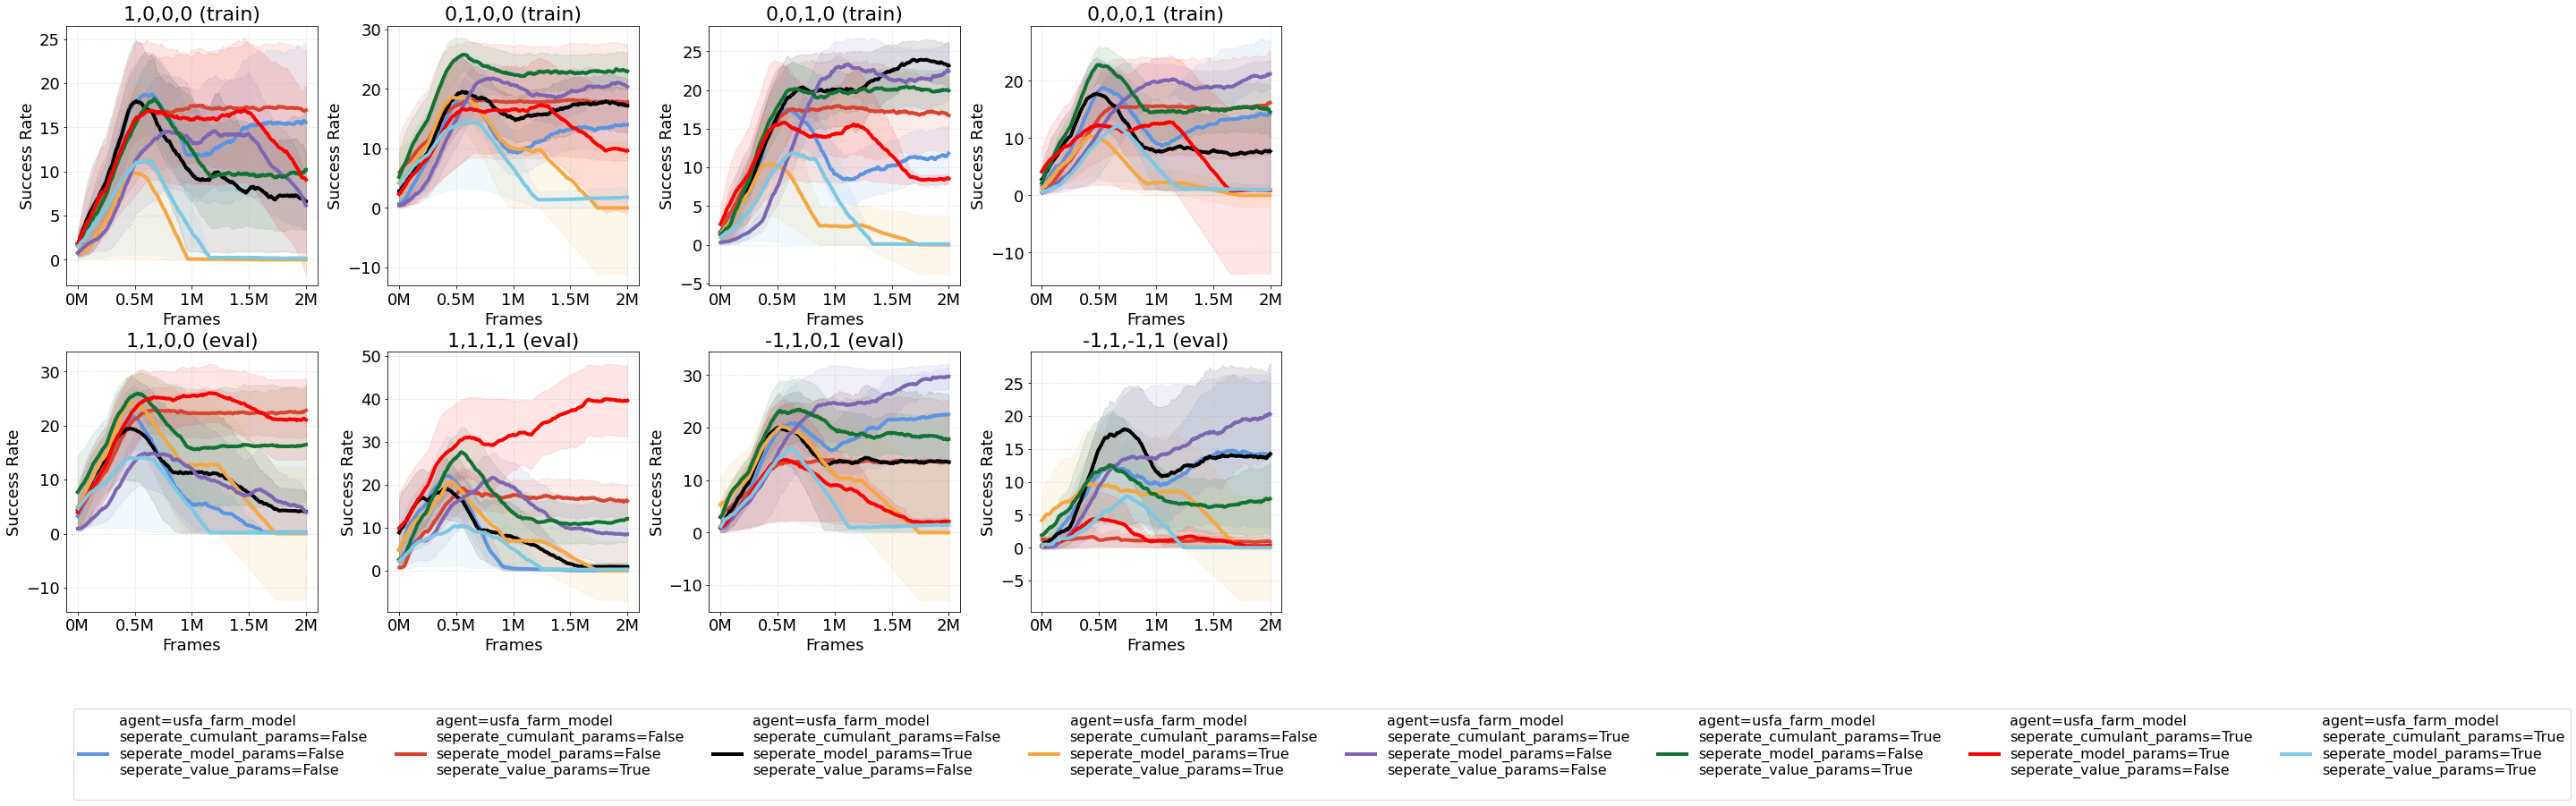

In [14]:
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    maxcols=4,
    data_filters=[
        dict(
            settings=dict(
                agent='usfa_farm_model',
                seperate_value_params=None,
                seperate_model_params=None,
                seperate_cumulant_params=None,
            ),
        ),
    ],
    display_settings=['agent'],
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.75), 
                ncol=8,
                ),
    # fig_kwargs=dict(legend_text_size=20),
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          xmax=2e6,
                          n_samples=400,
                          rolling=100,
                          std_alpha=.1,
                          err_fn=lambda h: h.grouped.sem(),
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

# Some Analysis

,num_seeds,agent
0,2,usfa_farm_model


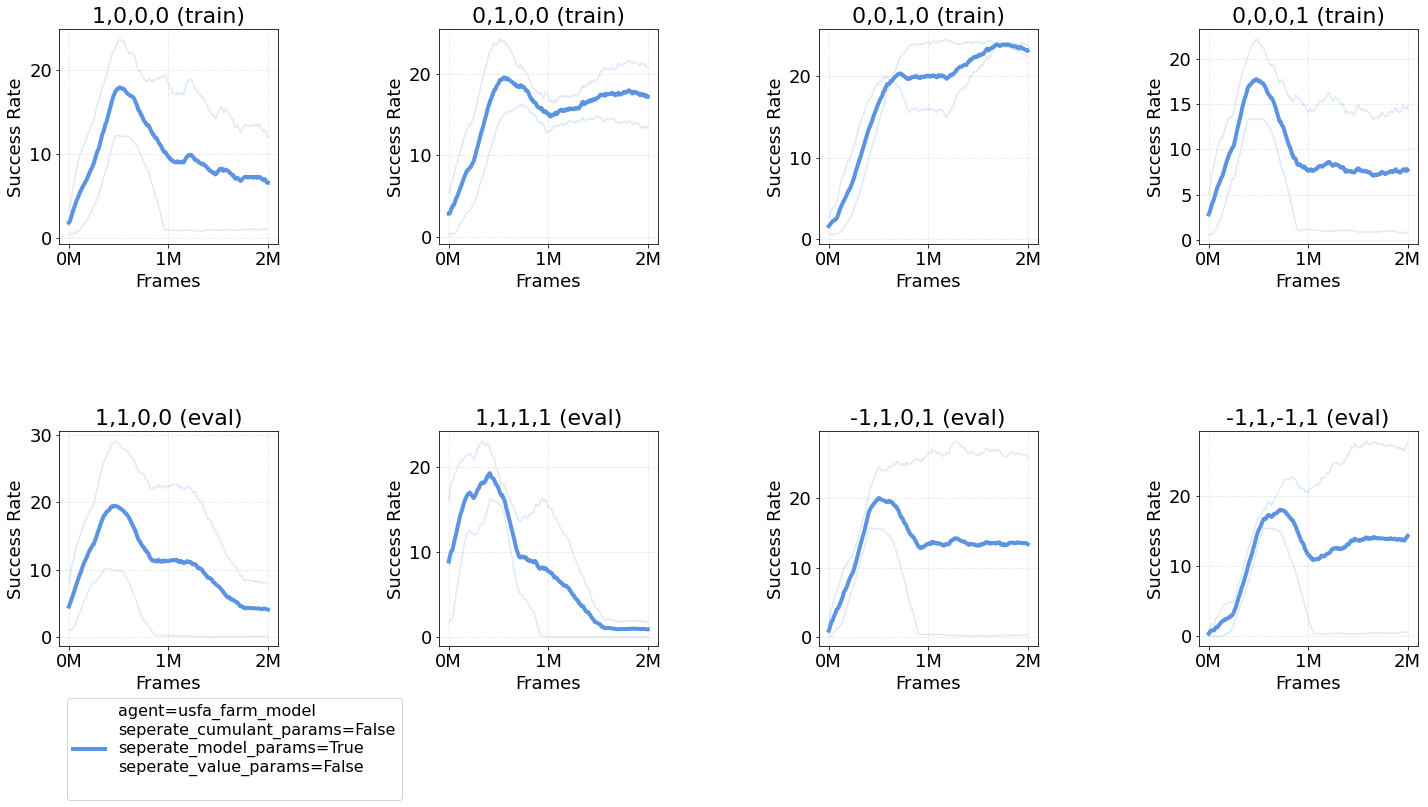

In [7]:
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    maxcols=4,
    data_filters=[
        dict(
            settings=dict(
                agent='usfa_farm_model',
                seperate_value_params=False,
                seperate_model_params=True,
                seperate_cumulant_params=False,
            ),
        ),
    ],
    display_settings=['agent'],
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.75), 
                ncol=8,
                ),
    # fig_kwargs=dict(legend_text_size=20),
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          xmax=2e6,
                          n_samples=400,
                          rolling=100,
                          std_alpha=.1,
                          err_fn=lambda h: h.grouped.sem(),
                          err_style='runs'),
    subplot_kwargs=dict(unit=5),
)

,num_seeds,agent
0,2,usfa_farm_model


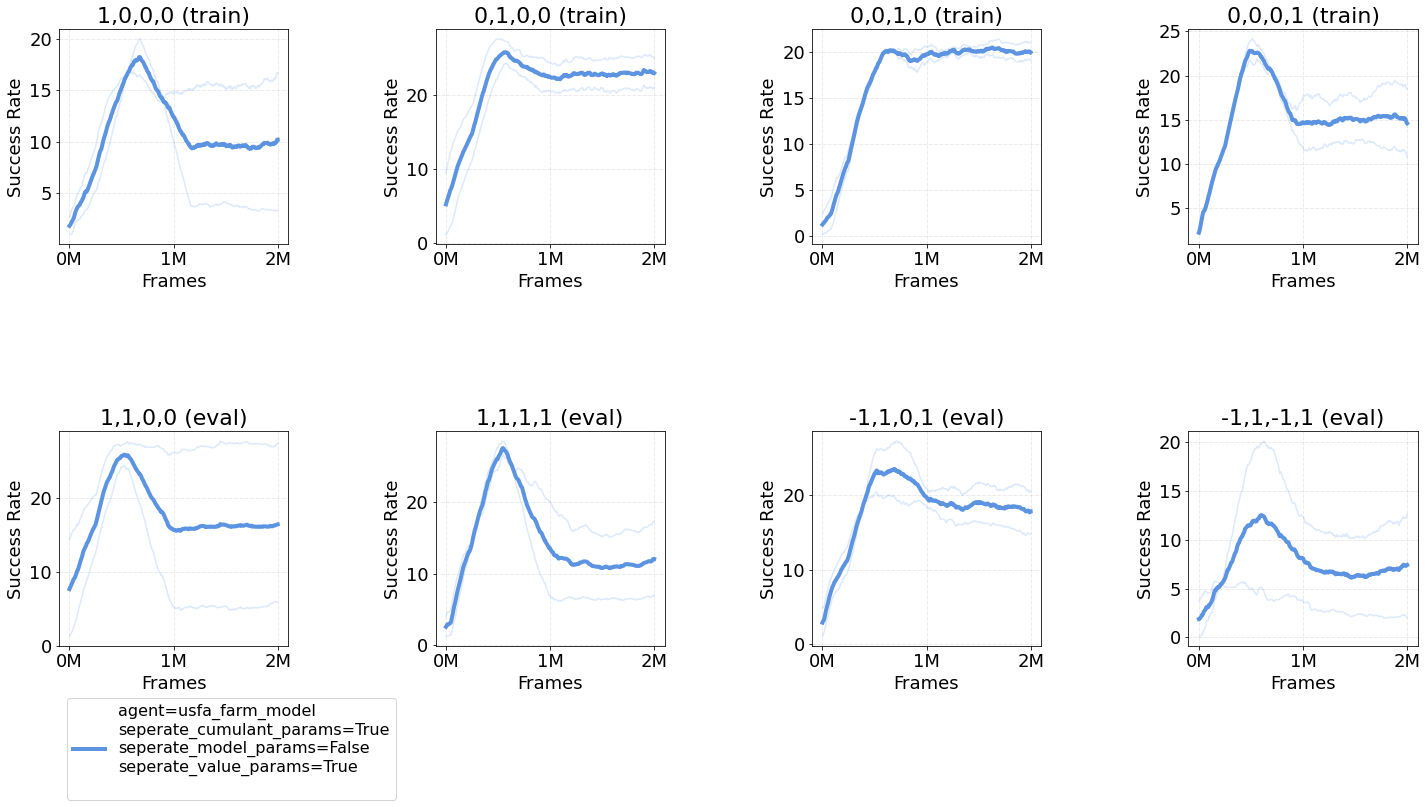

In [8]:
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    maxcols=4,
    data_filters=[
        dict(
            settings=dict(
                agent='usfa_farm_model',
                seperate_value_params=True,
                seperate_model_params=False,
                seperate_cumulant_params=True,
            ),
        ),
    ],
    display_settings=['agent'],
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.75), 
                ncol=8,
                ),
    # fig_kwargs=dict(legend_text_size=20),
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          xmax=2e6,
                          n_samples=400,
                          rolling=100,
                          std_alpha=.1,
                          err_fn=lambda h: h.grouped.sem(),
                          err_style='runs'),
    subplot_kwargs=dict(unit=5),
)